In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import baikalfunctions as bfunc
import scheme_mar2023 as scheme
import mysecure

In [8]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.__version__

'1.5.3'

In [3]:
# pd.set_option('display.min_rows', 100)
%matplotlib inline
plt.style.use('dark_background')   # try another styles: 'classic'
plt.rcParams['figure.figsize'] = [15, 5]
#plt.subplots_adjust(top=1, left=0, right=1, bottom=0)

In [4]:
pwd = 'G:\\1_Data1\\89_BaikalFeb2022\\'
saveImgPath = 'G:\\1_Data1\\89_BaikalFeb2022\\'
saveDataPath = 'G:\\1_Data1\\89_BaikalFeb2022\\'

In [68]:
names=['Date', 'Time', 'DateUTC', 'TimeUTC', 'latitude', 'longitude', 'speed', 'course', 'solar_altitude', 'solar-azimuth',
       'temperature_air', 'pressure_air', 'relative-humidity_air', 'precipitation', 'solar_eye', 'solar_uv',
       'co2_picarro', 'co2_picarro_max', 'co2_picarro_min', 'ch4_picarro', 'ch4_picarro_max', 'ch4_picarro_min', 'h2o_picarro', 'co2_licor', 'h2o_licor', 'o2_water', 'o2_water_temperature',
       'ph', 'temperature_water', 'temperature_equ_1', 'temperature_equ_2', 'temperature_equ_3', 'temperature_equ_4', 'flow_water', 'flow_air', 'channel', 'flag',
       'fluo_nx_red', 'fluo_nx_green', 'fluo_nx_blue', 'fluo_kfa_red', 'fluo_kfa_green', 'fluo_kfa_blue', 'comment',
       'water_flow_1', 'water_flow_2', 'water_flow_3', 'water_flow_4',
       'temperature_ds_1', 'temperature_ds_2', 'temperature_ds_3', 'temperature_ds_4', 'temperature_ds_5', 'temperature_ds_6', 'temperature_ds_7'
      ]
names

['Date',
 'Time',
 'DateUTC',
 'TimeUTC',
 'latitude',
 'longitude',
 'speed',
 'course',
 'solar_altitude',
 'solar-azimuth',
 'temperature_air',
 'pressure_air',
 'relative-humidity_air',
 'precipitation',
 'solar_eye',
 'solar_uv',
 'co2_picarro',
 'co2_picarro_max',
 'co2_picarro_min',
 'ch4_picarro',
 'ch4_picarro_max',
 'ch4_picarro_min',
 'h2o_picarro',
 'co2_licor',
 'h2o_licor',
 'o2_water',
 'o2_water_temperature',
 'ph',
 'temperature_water',
 'temperature_equ_1',
 'temperature_equ_2',
 'temperature_equ_3',
 'temperature_equ_4',
 'flow_water',
 'flow_air',
 'channel',
 'flag',
 'fluo_nx_red',
 'fluo_nx_green',
 'fluo_nx_blue',
 'fluo_kfa_red',
 'fluo_kfa_green',
 'fluo_kfa_blue',
 'comment',
 'water_flow_1',
 'water_flow_2',
 'water_flow_3',
 'water_flow_4',
 'temperature_ds_1',
 'temperature_ds_2',
 'temperature_ds_3',
 'temperature_ds_4',
 'temperature_ds_5',
 'temperature_ds_6',
 'temperature_ds_7']

In [138]:
df = pd.read_csv(pwd+'origin\\data.txt',
                 sep='\s+',
                 header=None,
                 names=names,
                 index_col=False,
                 parse_dates={'DateTime':['Date', 'Time']},
                 dayfirst=True,
                 na_values='-999999',
                 decimal=',',
                 nrows=1440*3*10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               43200 non-null  datetime64[ns]
 1   DateUTC                43200 non-null  object        
 2   TimeUTC                43200 non-null  object        
 3   latitude               43069 non-null  float64       
 4   longitude              43069 non-null  float64       
 5   speed                  43069 non-null  float64       
 6   course                 43069 non-null  float64       
 7   solar_altitude         43099 non-null  float64       
 8   solar-azimuth          43099 non-null  float64       
 9   temperature_air        43091 non-null  float64       
 10  pressure_air           43091 non-null  float64       
 11  relative-humidity_air  0 non-null      float64       
 12  precipitation          43091 non-null  float64       
 13  s

In [139]:
df

,DateTime,DateUTC,TimeUTC,latitude,longitude,speed,course,solar_altitude,solar-azimuth,temperature_air,pressure_air,relative-humidity_air,precipitation,solar_eye,solar_uv,co2_picarro,co2_picarro_max,co2_picarro_min,ch4_picarro,ch4_picarro_max,ch4_picarro_min,h2o_picarro,co2_licor,h2o_licor,o2_water,o2_water_temperature,ph,temperature_water,temperature_equ_1,temperature_equ_2,temperature_equ_3,temperature_equ_4,flow_water,flow_air,channel,flag,fluo_nx_red,fluo_nx_green,fluo_nx_blue,fluo_kfa_red,fluo_kfa_green,fluo_kfa_blue,comment,water_flow_1,water_flow_2,water_flow_3,water_flow_4,temperature_ds_1,temperature_ds_2,temperature_ds_3,temperature_ds_4,temperature_ds_5,temperature_ds_6,temperature_ds_7
0,2022-02-19 11:09:01,19.02.2022,3:09:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-19 11:09:24,19.02.2022,3:09:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-19 11:09:44,19.02.2022,3:09:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,3,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,26.913,26.667,26.960,NaN,NaN,NaN,NaN,NaN
3,2022-02-19 11:10:04,19.02.2022,3:10:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,3,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,27.877,27.554,27.939,NaN,NaN,NaN,NaN,NaN
4,2022-02-19 11:10:24,19.02.2022,3:10:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,3,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,27.885,27.542,27.958,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,2022-03-01 12:27:47,01.03.2022,4:27:47,51.899642,105.063800,0.120,0.0,30.30456,167.22854,3.39,96451.4,NaN,2.06,25067.0,96.75,722.815,734.0212,711.6092,76.856,93.8092,59.9021,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5.513,5.274,5.484,0.0,0.554,21.226,1.476,NaN,NaN,NaN,NaN,NaN
43196,2022-03-01 12:28:08,01.03.2022,4:28:08,51.899643,105.063792,0.064,0.0,30.31613,167.32485,3.63,96449.6,NaN,2.06,25067.0,98.00,760.855,786.7016,734.0212,87.914,93.8092,84.9584,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5.574,5.401,5.522,0.0,0.554,21.244,1.464,NaN,NaN,NaN,NaN,NaN
43197,2022-03-01 12:28:28,01.03.2022,4:28:28,51.899653,105.063791,0.095,0.0,30.32752,167.42043,3.47,96449.8,NaN,2.07,25067.0,98.22,786.702,NaN,NaN,84.958,NaN,NaN,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5.470,5.376,5.442,0.0,0.554,21.238,1.446,NaN,NaN,NaN,NaN,NaN
43198,2022-03-01 12:28:48,01.03.2022,4:28:48,51.899653,105.063786,0.086,0.0,30.33875,167.51523,3.52,96448.3,NaN,2.03,27773.0,102.70,850.778,866.9674,818.3981,63.368,71.3845,59.3603,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5.483,5.319,5.428,0.0,0.561,21.256,1.464,NaN,NaN,NaN,NaN,NaN


In [140]:
df.head(500).tail(200).sample(5)

,DateTime,DateUTC,TimeUTC,latitude,longitude,speed,course,solar_altitude,solar-azimuth,temperature_air,pressure_air,relative-humidity_air,precipitation,solar_eye,solar_uv,co2_picarro,co2_picarro_max,co2_picarro_min,ch4_picarro,ch4_picarro_max,ch4_picarro_min,h2o_picarro,co2_licor,h2o_licor,o2_water,o2_water_temperature,ph,temperature_water,temperature_equ_1,temperature_equ_2,temperature_equ_3,temperature_equ_4,flow_water,flow_air,channel,flag,fluo_nx_red,fluo_nx_green,fluo_nx_blue,fluo_kfa_red,fluo_kfa_green,fluo_kfa_blue,comment,water_flow_1,water_flow_2,water_flow_3,water_flow_4,temperature_ds_1,temperature_ds_2,temperature_ds_3,temperature_ds_4,temperature_ds_5,temperature_ds_6,temperature_ds_7
438,2022-02-19 13:35:54,19.02.2022,5:35:54,51.899649,105.063827,0.071,0.0,27.37514,186.17759,-2.50,97896.0,NaN,0.0,34467.0,114.95,428.563,428.6203,428.4819,2.036,2.0363,2.0353,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,6,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,17.690,17.726,17.847,NaN,NaN,NaN,NaN,NaN
390,2022-02-19 13:19:49,19.02.2022,5:19:49,51.899626,105.063808,0.112,0.0,27.54230,181.72625,-3.77,97907.7,NaN,0.0,33897.0,109.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,6,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,18.036,18.048,18.109,NaN,NaN,NaN,NaN,NaN
311,2022-02-19 12:53:21,19.02.2022,4:53:21,51.899608,105.063797,0.153,0.0,27.39777,174.39527,-4.00,97921.5,NaN,0.0,31334.0,104.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,6,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,19.090,19.127,19.220,NaN,NaN,NaN,NaN,NaN
383,2022-02-19 13:17:28,19.02.2022,5:17:28,51.899630,105.063816,0.217,0.0,27.55060,181.07730,-3.62,97907.9,NaN,0.0,31334.0,106.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,6,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,18.090,18.066,18.134,NaN,NaN,NaN,NaN,NaN
338,2022-02-19 13:02:24,19.02.2022,5:02:24,51.899659,105.063794,0.109,0.0,27.50582,176.89772,-3.63,97911.3,NaN,0.0,28200.0,94.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,6,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,18.488,18.488,18.566,NaN,NaN,NaN,NaN,NaN


In [141]:
list(df.columns)

['DateTime',
 'DateUTC',
 'TimeUTC',
 'latitude',
 'longitude',
 'speed',
 'course',
 'solar_altitude',
 'solar-azimuth',
 'temperature_air',
 'pressure_air',
 'relative-humidity_air',
 'precipitation',
 'solar_eye',
 'solar_uv',
 'co2_picarro',
 'co2_picarro_max',
 'co2_picarro_min',
 'ch4_picarro',
 'ch4_picarro_max',
 'ch4_picarro_min',
 'h2o_picarro',
 'co2_licor',
 'h2o_licor',
 'o2_water',
 'o2_water_temperature',
 'ph',
 'temperature_water',
 'temperature_equ_1',
 'temperature_equ_2',
 'temperature_equ_3',
 'temperature_equ_4',
 'flow_water',
 'flow_air',
 'channel',
 'flag',
 'fluo_nx_red',
 'fluo_nx_green',
 'fluo_nx_blue',
 'fluo_kfa_red',
 'fluo_kfa_green',
 'fluo_kfa_blue',
 'comment',
 'water_flow_1',
 'water_flow_2',
 'water_flow_3',
 'water_flow_4',
 'temperature_ds_1',
 'temperature_ds_2',
 'temperature_ds_3',
 'temperature_ds_4',
 'temperature_ds_5',
 'temperature_ds_6',
 'temperature_ds_7']

In [142]:
df.drop([f'temperature_equ_{i}' for i in range(4)], axis='columns', inplace=True, errors='ignore')

In [74]:
df.rename(columns=scheme.NAME_CONV_BAS, inplace=True)
df.sort_values(by='DateTime', inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(2)

,DateTime,DateUTC,TimeUTC,Latitude,Longitude,Speed,Course,solar_altitude,solar-azimuth,TempAir,PressAir,relative-humidity_air,Precipitation,LightLX,LightUV,vCO2,vCO2max,vCO2min,vCH4,vCH4max,vCH4min,vH2O,co2_licor,h2o_licor,o2_water,o2_water_temperature,ph,temperature_water,temperature_equ_4,flow_water,AirFlow,Channel,flag,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu,Comments,WaterFlowEqu1,WaterFlowEqu2,WaterFlowEqu3,WaterFlowEqu4,TempEqu1,TempEqu2,TempEqu3,TempEqu4,temperature_ds_5,temperature_ds_6,temperature_ds_7
0,2022-02-19 11:09:01,19.02.2022,3:09:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-19 11:09:24,19.02.2022,3:09:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.55,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.sort_values(by='DateTime', inplace=True)

In [76]:
### remove service variables
df.drop([x for x in df.columns if x.lower().endswith('err')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('max')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('min')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().startswith('pump')], axis='columns', inplace=True, errors='ignore')
df.drop(['HumidityAir', ], axis='columns', inplace=True, errors='ignore')


In [77]:
df.shape, df.columns

((43200, 47),
 Index(['DateTime', 'DateUTC', 'TimeUTC', 'Latitude', 'Longitude', 'Speed',
        'Course', 'solar_altitude', 'solar-azimuth', 'TempAir', 'PressAir',
        'relative-humidity_air', 'Precipitation', 'LightLX', 'LightUV', 'vCO2',
        'vCH4', 'vH2O', 'co2_licor', 'h2o_licor', 'o2_water',
        'o2_water_temperature', 'ph', 'temperature_water', 'temperature_equ_4',
        'flow_water', 'AirFlow', 'Channel', 'flag', 'FluoNxRed', 'FluoNxGrn',
        'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'Comments',
        'WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'TempEqu4', 'temperature_ds_5',
        'temperature_ds_6', 'temperature_ds_7'],
       dtype='object'))

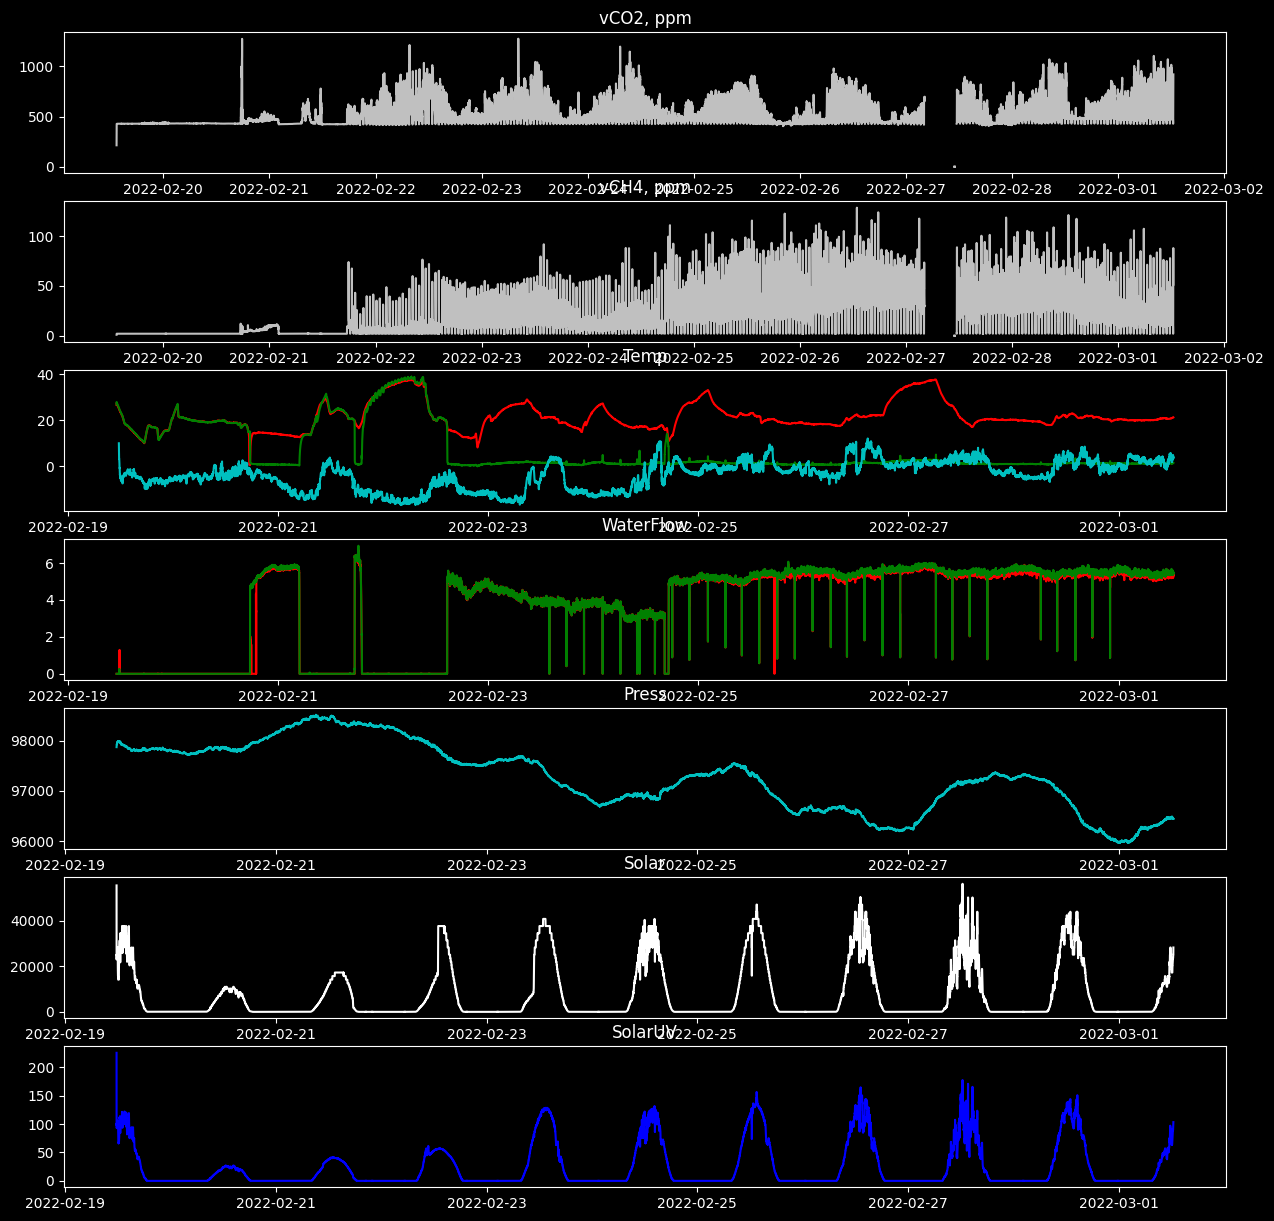

In [78]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(7, 1)

axs[0].set_title('vCO2, ppm')
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver')

axs[1].set_title('vCH4, ppm')
axs[1].plot(df.DateTime, df['vCH4'], '-', c='silver')

axs[2].set_title('Temp')
axs[2].plot(df.DateTime, df['TempEqu1'], 'r-')
axs[2].plot(df.DateTime, df['TempEqu2'], 'g-')
axs[2].plot(df.DateTime, df['TempAir'], 'c-')

axs[3].set_title('WaterFlow')
axs[3].plot(df.DateTime, df['WaterFlowEqu1'], 'r-')
axs[3].plot(df.DateTime, df['WaterFlowEqu2'], 'g-')

axs[4].set_title('Press')
axs[4].plot(df.DateTime, df['PressAir'], 'c-')
axs[5].set_title('Solar')
axs[5].plot(df.DateTime, df['LightLX'], 'w-')
axs[6].set_title('SolarUV')
axs[6].plot(df.DateTime, df['LightUV'], 'b-')



### Correction data  
 ** Be carefull !!!  Make it ONCE !!! **


In [79]:
## gether/apply specific variables
### data corrections
# df['vCO2'] = df['vCO2'] * scheme.CO2PicarroScaut_cor[0] + scheme.CO2PicarroScaut_cor[1]
# df['vCH4'] = df['vCH4'] * scheme.CH4PicarroScaut_cor[0] + scheme.CH4PicarroScaut_cor[1]
# df['vCO2'] = df['CO2_dry']
# df['vCH4'] = df['CH4_dry']
df['LightLX'] = df['LightLX'] * scheme.solar_cor[0] + scheme.solar_cor[1]
df['LightUV'] = df['LightUV'] * scheme.solar_uv_cor[0] + scheme.solar_uv_cor[1]
df['PressAir'] = bfunc.pressConvert(df['PressAir'])
df['PressAir'] = df['PressAir'] * scheme.press_cor[0] + scheme.press_cor[1]

### servise data corrections
df['TempEqu1'] = df['TempEqu1'] * scheme.tempEqu1_cor[0] + scheme.tempEqu1_cor[1]
df['TempEqu2'] = df['TempEqu2'] * scheme.tempEqu2_cor[0] + scheme.tempEqu2_cor[1]

df['AirFlow'] = df['AirFlow'] * scheme.airflow_cor[0] + scheme.airflow_cor[1]
df['WaterFlowEqu1'] = df['WaterFlowEqu1'] * scheme.waterflowEqu1_cor[0] + scheme.waterflowEqu1_cor[1]
df['WaterFlowEqu2'] = df['WaterFlowEqu2'] * scheme.waterflowEqu2_cor[0] + scheme.waterflowEqu2_cor[1]


<Axes: xlabel='DateTime'>

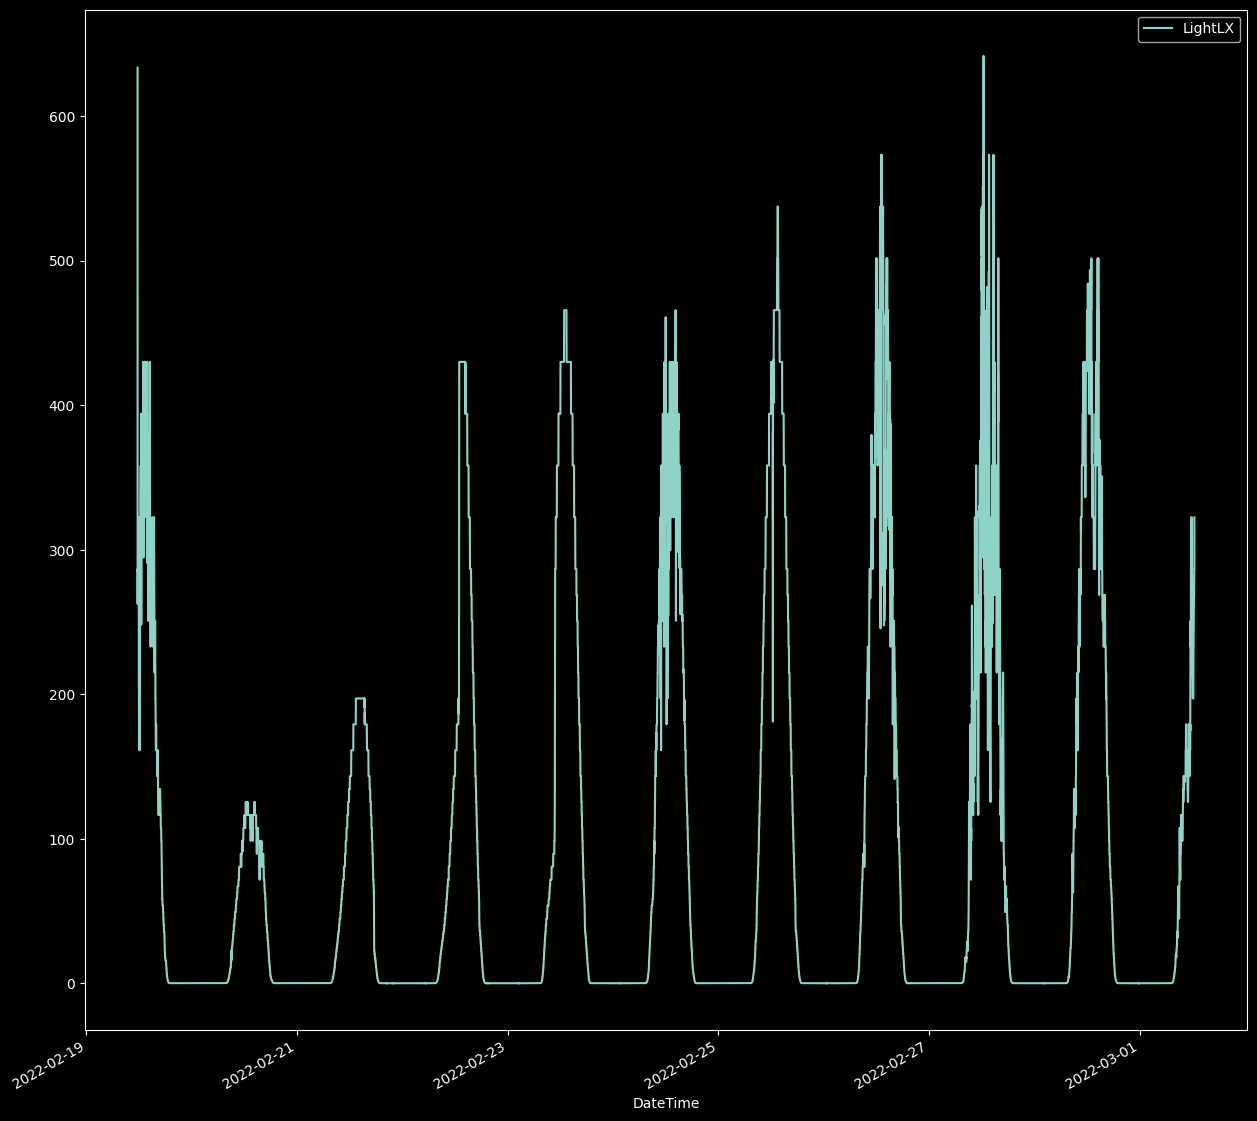

In [80]:
df.plot('DateTime', 'LightLX')

In [126]:
v_state_list = list(scheme.CHANNEL_COLS.values())

chnl = 'Channel'
if not chnl in df.columns:
    df[chnl] = 0
if 'V1_state' in df.columns:
    df.loc[df.V1_state == 1, chnl] = 1
    df.loc[df.V2_state == 1, chnl] = 2
    df.loc[df.V3_state == 1, chnl] = 3
    df.loc[df.V4_state == 1, chnl] = 4
    df.loc[df.V5_state == 1, chnl] = 5
    df.loc[df.V6_state == 1, chnl] = 6
df.drop(v_state_list, inplace=True, errors='ignore')

In [127]:
df['vCO2air'] = df['vCO2'][(df[chnl] == 6) & (df[ch_v] == 1)]
df['vCH4air'] = df['vCH4'][(df[chnl] == 6) & (df[ch_v] == 1)]
for col in ['vCO2air', 'vCH4air',]:
    df[col] = df[col].rolling(3).mean()

df['vCO2air'].interpolate(method='values', inplace=True)
df['vCH4air'].interpolate(method='values', inplace=True)  ## `time` method mb better
df['pCO2air'] = df['vCO2air'] * df['PressAir']  # mkatm
df['pCH4air'] = df['vCH4air'] * df['PressAir']  # mkatm

###  Remove bad data   
List of accidental cases to filter data (see notes)

In [128]:
filter_list = [{'date_start': '01.08.2023 00:00', 'date_stop': '01.08.2023 13:00', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro is not ready
               {'date_start': '01.08.2023 13:32', 'date_stop': '01.08.2023 13:35', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro data is zero
               {'date_start': '01.08.2023 17:00', 'date_stop': '01.08.2023 17:20', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro gas pipe fault
               {'date_start': '01.08.2023 17:19', 'date_stop': '01.08.2023 17:25', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro gas pipe fault
               {'date_start': '02.08.2023 10:54', 'date_stop': '02.08.2023 10:59', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # gas pipe fault, change of desiccant
               {'date_start': '04.08.2023 11:05', 'date_stop': '04.08.2023 11:10', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # gas pipe fault, change of desiccant
               {'date_start': '04.08.2023 12:26', 'date_stop': '04.08.2023 14:39', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '04.08.2023 14:30', 'date_stop': '04.08.2023 14:37', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # pump 'surface' disconnected
               {'date_start': '05.08.2023 02:30', 'date_stop': '05.08.2023 08:06', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '06.08.2023 16:55', 'date_stop': '06.08.2023 16:59', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '07.08.2023 13:23', 'date_stop': '07.08.2023 16:06', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # channel selector unit disfunction
               {'date_start': '07.08.2023 13:42', 'date_stop': '07.08.2023 16:56', 'cols': ['WaterFlowEqu1', 'WaterFlowEqu2'], 'fill_with': 0},  # water flow unstable
               {'date_start': '07.08.2023 16:19', 'date_stop': '07.08.2023 16:44', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '08.08.2023 06:56', 'date_stop': '08.08.2023 10:56', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 02:30', 'date_stop': '08.08.2023 10:00', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 10:43', 'date_stop': '08.08.2023 10:51', 'cols': ['TempEqu1'], 'fill_with': np.NaN},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['WaterFlowEqu2'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 14:51', 'date_stop': '08.08.2023 14:59', 'cols': ['TempEqu1'], 'fill_with': np.NaN},
              ]

for cycle in filter_list:
    for col in cycle['cols']:
        date_start = pd.to_datetime(cycle['date_start'], dayfirst=True)
        date_stop = pd.to_datetime(cycle['date_stop'], dayfirst=True)
        df.loc[(df['DateTime'] > date_start) & (df['DateTime'] < date_stop), col] = cycle['fill_with']

In [129]:
cols = ['FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu']
for col in cols:
    df.loc[df[col] == 0, col] = np.NaN
cols = ['WaterFlowEqu1', 'WaterFlowEqu2', 'AirFlow']
for col in cols:
    df.loc[df[col] < 0, col] = np.NaN

In [130]:
ch_v = 'Chn_valid'
df[ch_v] = 1
for deep in range(1, 7):
    df.loc[df[chnl] != df[chnl].shift(deep), ch_v] = 0


## Flux calc

In [ ]:
df

In [ ]:
### find the moments where flux is valid to calculate
### before 02.10.2023 15:30 there was long cycle flux measure
### after this time a short cycle took place

t = pd.to_datetime('02.10.2023 15:30', dayfirst=True)
df['flag'] = (df['Channel'] == 5) 
for deep in range(50):
    df['flag'] &= (df['Channel'] == df['Channel'].shift(deep))

tempflag = (df['Channel'] == 5) & (df['DateTime'] > t) 

for deep in range(10):
    tempflag &= (df['Channel'] == df['Channel'].shift(deep))

df['flag'] |= tempflag
# set flag for 50 points skipping first 10 points  
df['flag'] = df['flag'].astype('int8')
# count flux cycles for grouping
df['fluxEvent'] = (df['flag']==0) & (df['flag'].shift(-1)!=0)
df['fluxCount'] = df['fluxEvent'].cumsum() * df['flag']
#df['flag'] |= (df['Channel'] == 5) & (df['DateTime'] > t)

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(1, 1)

axs.set_title('vCO2, ppm')
axs.plot('DateTime', 'flag', '-', data=df.tail(200), c='silver')
axs.plot('DateTime', 'fluxEvent', '-', data=df.tail(200), c='red')
axs.plot('DateTime', 'fluxCount', '-', data=df.tail(200), c='blue')

In [ ]:
ch_v = 'flag'
df['cCO2chm'] = df['vCO2'][(df[chnl] == 5) & (df[ch_v] == 1)] * df['PressAir'] * bfunc.getDensity(temp=0, press=1, gas='CO2') / 1000
df['cCH4chm'] = df['vCH4'][(df[chnl] == 5) & (df[ch_v] == 1)] * df['PressAir'] * bfunc.getDensity(temp=0, press=1, gas='CH4') 
df['DateSec'] = df['DateTime'].astype('int64')//10**9
for col in ['cCO2chm', 'cCH4chm']:
    df[col] = df[col].rolling(3).mean()

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'cCH4chm', 'ro', linewidth=1, alpha=0.2, data=df )
ax.plot('DateTime', 'flag', 'c-', linewidth=1, alpha=0.8, data=df)
ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('02.10.2023 18:00', dayfirst=True))

In [ ]:
deep = 2
df['CO2flux'] = (df['cCO2chm'].shift(-deep) - df['cCO2chm'].shift(deep)) / (df['DateSec'].shift(-deep) - df['DateSec'].shift(deep)) * 3600 / 0.81 * 320
df['CH4flux'] = (df['cCH4chm'].shift(-deep) - df['cCH4chm'].shift(deep)) / (df['DateSec'].shift(-deep) - df['DateSec'].shift(deep)) * 3600 / 0.81 * 320

In [ ]:
dft = df.copy()

In [ ]:
def ff(dff):
    dff.dropna(inplace=True)
    l = int(len(dff)/2)  # point to the middle of array
    return dff.sort_values()[l-2:l+2].mean()
    
dfr = dft['CO2flux'].groupby(dft['fluxCount']).apply(ff)
dft=dft.merge(dfr, how='left', right_on='fluxCount', left_on='fluxCount')
dfr = dft['CH4flux'].groupby(dft['fluxCount']).apply(ff)
dft=dft.merge(dfr, how='left', right_on='fluxCount', left_on='fluxCount')
dft

In [ ]:
plt.rcParams['figure.figsize'] = [17, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'CO2flux_x', 'ro', linewidth=1, alpha=0.2, data=dft)
ax.plot('DateTime', 'CO2flux_y', 'go', linewidth=1, alpha=0.2, data=dft, markersize=3)
# ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('08.10.2023 18:00', dayfirst=True))
ax.set_ylim(-50, 50)
ax.grid(alpha=0.2)

In [ ]:
plt.rcParams['figure.figsize'] = [17, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'CH4flux_x', 'ro', linewidth=1, alpha=0.2, data=dft)
ax.plot('DateTime', 'CH4flux_y', 'go', linewidth=1, alpha=0.2, data=dft, markersize=3)
# ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('08.10.2023 18:00', dayfirst=True))
ax.set_ylim(-50, 50)
ax.grid(alpha=0.2)

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'CH4flux_x', 'ro', linewidth=1, alpha=0.2, data=dft)
ax.plot('DateTime', 'CH4flux_y', 'go', linewidth=1, alpha=0.2, data=dft)
ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('03.10.2023 18:00', dayfirst=True))
ax.set_ylim(-200, 200)

In [ ]:
df = dft.copy()

In [ ]:
filter_list = [{'date_start': '07.08.2023 17:00', 'date_stop': '07.08.2023 17:10', 'cols': ['CO2flux', 'CH4flux'], 'fill_with': np.NaN},   # Wrench is blocked
               {'date_start': '08.08.2023 01:30', 'date_stop': '08.08.2023 11:20', 'cols': ['CO2flux', 'CH4flux'], 'fill_with': np.NaN},   # Wrench is blocked
              ]

for cycle in filter_list:
    date_start = pd.to_datetime(cycle['date_start'], dayfirst=True)
    date_stop = pd.to_datetime(cycle['date_stop'], dayfirst=True)
    for col in cycle['cols']:
        df.loc[(df['DateTime'] > date_start) & (df['DateTime'] < date_stop), col] = cycle['fill_with']

In [ ]:
## do not know why is it here
df = df.resample('20S', on='DateTime').mean()
df[chnl].fillna(method='ffill', inplace=True)

In [ ]:
df['DateTime'] = df.index


In [ ]:
df

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(2, 1)

axs[0].set_title('CO2 air, ppm')
axs[0].set_ylim(150, 650)
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver')
axs[0].plot(df.DateTime, df['vCO2air'], 'r-')

axs[1].set_title('CH4 air, ppm')
axs[1].set_ylim(0, 20)
axs[1].plot(df.DateTime, df['vCH4'], '-', c='silver')
axs[1].plot(df.DateTime, df['vCH4air'], 'b-')
fig.savefig(saveImgPath+'cAir_vs_time.png', transparent=False)

In [ ]:
df.columns

## RECOVERY !!!

In [87]:
df['DateSec'] = df['DateTime'].astype('int64')//10**9
df['dTSec'] = df['DateSec'] - df['DateSec'].shift(1)
dt = df['dTSec'] / 60   ## delta time, min
ch_v = 'Chn_valid'

#### recovery `CO2/CH4`, channel `1` (bottom in Feb 2022)

In [88]:
equ_vol = scheme.equ_walltube_param['equ_vol']  # equivalent equ volume, l
equ_cap = scheme.equ_walltube_param['equ_cap']  # equilibrator capacity
wtr_flow_min = scheme.equ_walltube_param['water_flow_min'] 

In [89]:
t_wtr = df['TempEqu1']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu1']
air_flow = df['AirFlow']

In [90]:
t_wtr

0           NaN
1           NaN
2        27.117
3        28.004
4        27.992
          ...  
43195    21.676
43196    21.694
43197    21.688
43198    21.706
43199    21.700
Name: TempEqu1, Length: 43200, dtype: float64

In [93]:
### CO2 water
df['vCO2equ'] = df['vCO2'][(df[chnl] == 1) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = df['vCO2equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2bot'] = cGasWtr * 1000     # mg/l
df['pCO2bot'] = cGasWtr * 1000000 / solubility  # mkatm

In [94]:
### CH4 water
df['vCH4equ'] = df['vCH4'][(df[chnl] == 1) & (df[ch_v] == 1)]
solubility = bfunc.getSolubility(t_wtr, 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = df['vCH4equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4bot'] = cGasWtr * 1000000000    # ng/l
df['pCH4bot'] = cGasWtr * 1000000 / solubility  # mkatm

#### recovery `CO2/CH4`, channel `3` (surface in Feb 2022)

In [110]:
t_wtr = df['TempEqu2']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu3']  # waterflow sensor at channel #2 didn't work properly

In [111]:
t_wtr.describe()

count    43155.000000
mean         6.720823
std         10.180307
min         -0.134000
25%          0.842000
50%          1.225000
75%         12.191500
max         38.734000
Name: TempEqu2, dtype: float64

In [131]:
### CO2 water
df['vCO2equ'] = df['vCO2'][(df[chnl] == 3) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = df['vCO2equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2sur'] = cGasWtr * 1000     # mg/l
df['pCO2sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [134]:
### CH4 water
df['vCH4equ'] = df['vCH4'][(df[chnl] == 3) & (df[ch_v] == 1)]
solubility = bfunc.getSolubility(t_wtr, 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = df['vCH4equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4sur'] = cGasWtr * 1000000000    # ng/l
df['pCH4sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [135]:
## rolling average is applied inplace. Be cafelly, run this cell **ONCE**

for col in ['cCO2sur', 'cCO2bot', 'pCO2sur', 'pCO2bot', 'cCH4sur', 'pCH4sur', 'cCH4bot', 'pCH4bot']:
    df.loc[df[col] == np.inf , col] = np.nan 
    df.loc[df[col] == -np.inf , col] = np.nan
    df.loc[df[col] <= 0 , col] = np.nan
    df[col] = df[col].rolling(3, center=True).mean()

In [136]:
df['pCH4bot'].describe()

count    10571.000000
mean        62.054832
std         25.875137
min         11.728190
25%         44.133820
50%         56.141931
75%         83.937147
max        211.999061
Name: pCH4bot, dtype: float64

In [137]:
df['pCH4sur'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pCH4sur, dtype: float64

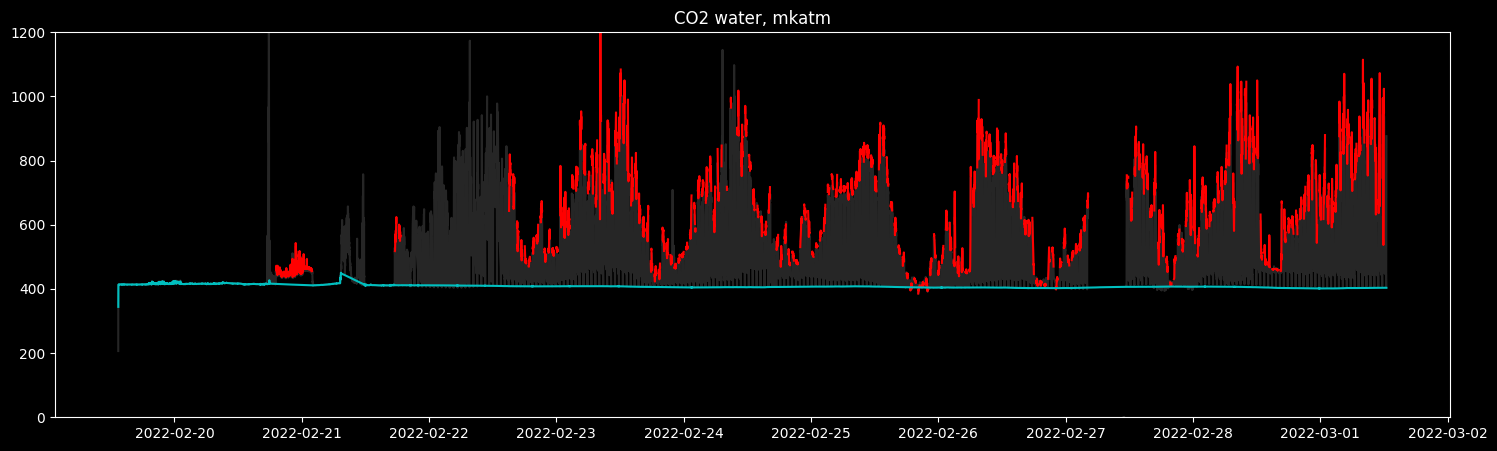

In [120]:
df['pCO2'] = df['vCO2'] * df['PressAir']

plt.rcParams['figure.figsize'] = [18, 5]
fig, ax = plt.subplots()
## ax.set_xlim(pd.to_datetime('05.06.2023 18:00:00', dayfirst=True), pd.to_datetime('05.06.2023 19:00:00', dayfirst=True))
ax.set_title('CO2 water, mkatm')
ax.set_ylim(0, 1200)
ax.plot(df.DateTime, df['pCO2'], '-', c='silver', alpha=0.2)
ax.plot(df.DateTime, df['pCO2sur'], 'g-')
ax.plot(df.DateTime, df['pCO2bot'], 'r-')
ax.plot(df.DateTime, df['pCO2air'], 'c-')
fig.savefig(saveImgPath+'pCO2wtr_vs_time.png')

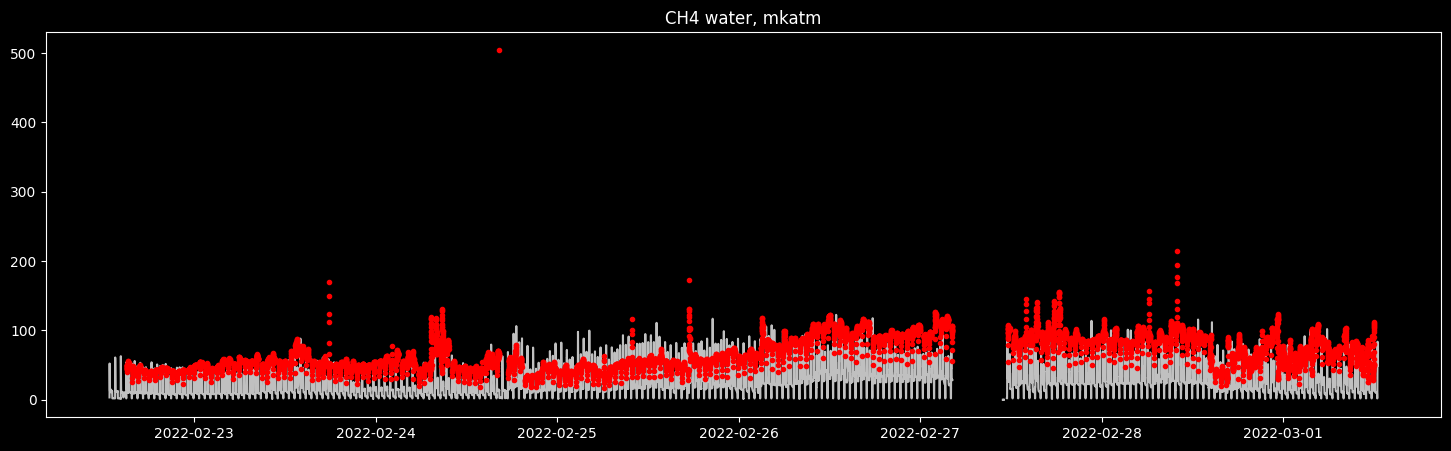

In [118]:
count_recent = 30000
df['pCH4'] = df['vCH4'] * df['PressAir']
plt.rcParams['figure.figsize'] = [18, 5]
fig, ax = plt.subplots()
ax.set_title('CH4 water, mkatm')
# ax.set_xlim(pd.to_datetime('06.06.2023 10:00:00', dayfirst=True), pd.to_datetime('06.06.2023 19:00:00', dayfirst=True))
# ax.set_ylim(0, 20)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4'], '-', c='silver')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4bot'], 'r.')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4sur'], 'g.')
fig.savefig(saveImgPath+'pCH4wtr_vs_time.png')

In [119]:
df.columns

Index(['DateTime', 'DateUTC', 'TimeUTC', 'Latitude', 'Longitude', 'Speed',
       'Course', 'solar_altitude', 'solar-azimuth', 'TempAir', 'PressAir',
       'relative-humidity_air', 'Precipitation', 'LightLX', 'LightUV', 'vCO2',
       'vCH4', 'vH2O', 'co2_licor', 'h2o_licor', 'o2_water',
       'o2_water_temperature', 'ph', 'temperature_water', 'temperature_equ_4',
       'flow_water', 'AirFlow', 'Channel', 'flag', 'FluoNxRed', 'FluoNxGrn',
       'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'Comments',
       'WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
       'TempEqu1', 'TempEqu2', 'TempEqu3', 'TempEqu4', 'temperature_ds_5',
       'temperature_ds_6', 'temperature_ds_7', 'Chn_valid', 'DateSec', 'dTSec',
       'vCO2equ', 'vCO2air', 'vCH4air', 'pCO2air', 'pCH4air', 'cCO2bot',
       'pCO2bot', 'vCH4equ', 'cCH4bot', 'pCH4bot', 'cCO2sur', 'pCO2sur',
       'cCH4sur', 'pCH4sur', 'pCO2', 'pCH4'],
      dtype='object')

In [121]:
df['hour'] = df['DateTime'].dt.hour # + df['DateTime'].dt.minute / 60
df['hour']

0        11
1        11
2        11
3        11
4        11
         ..
43195    12
43196    12
43197    12
43198    12
43199    12
Name: hour, Length: 43200, dtype: int64

KeyError: 'CO2flux_y'

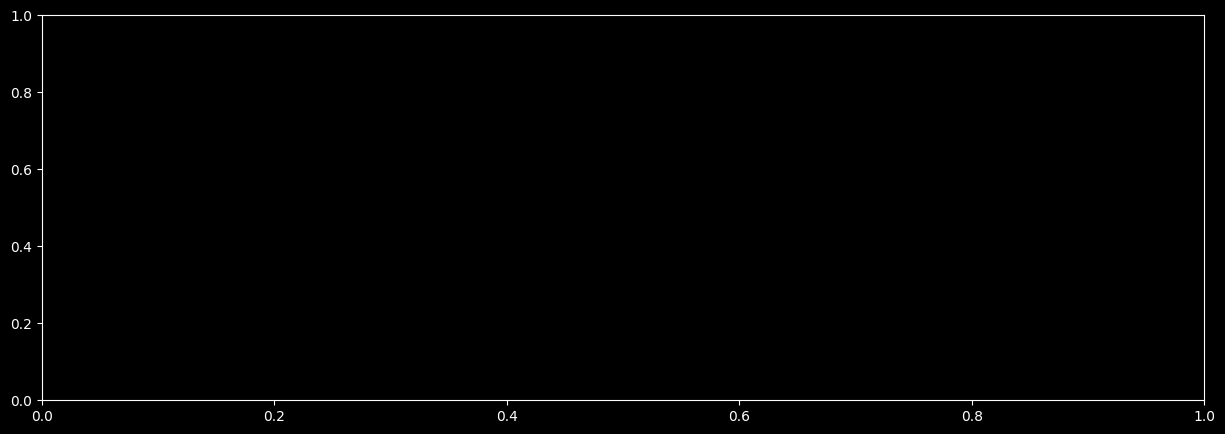

In [122]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot(df['hour'], df['CO2flux_y'], 'ro', linewidth=1, alpha=0.2, data=df )
ax.grid(alpha=.2)
# ax.set_ylim(-100, 10)

In [123]:
cols = ['hour', 'DateSec', 'TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
        'vCO2', 'vCH4', 'vH2O', 'AirFlow', 'Channel',
        'FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'WaterFlowEqu1',
        'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'cCO2chm', 'cCH4chm',
        # 'CO2flux', 'CH4flux', 'vCO2air', 'vCH4air',
        'pCO2air', 'pCH4air', 'cCO2sur', 'pCO2sur',
        'cCH4sur', 'pCH4sur', 'cCO2bot', 'pCO2bot', 'cCH4bot', 'pCH4bot',]
df.to_csv(f'{saveDataPath}BaikalFeb22.dat',
          # columns=cols,
          sep='\t',
         )

In [124]:
func_list = ['mean', 'std']
hourly = df.resample('1H', on='DateTime').agg(func_list)

cols = ['hour', 'DateSec', 'TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
        'vCO2', 'vCH4', 'vH2O',
        'FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'WaterFlowEqu1',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'cCO2chm', 'cCH4chm',
        # 'CO2flux', 'CH4flux', 'vCO2air', 'vCH4air',
        'pCO2air', 'pCH4air', 'cCO2sur', 'pCO2sur',
        'cCH4sur', 'pCH4sur', 'cCO2bot', 'pCO2bot', 'cCH4bot', 'pCH4bot',]
hourly.to_csv(f'{saveDataPath}BaikalFeb22hourly.dat',
              # columns=cols,
              sep='\t',
             )

C:\Users\pestu\AppData\Local\Temp\ipykernel_3484\2311076785.py:2: FutureWarning: ['DateUTC', 'TimeUTC'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  hourly = df.resample('1H', on='DateTime').agg(func_list)
